In [1]:
import itertools as it
import matplotlib.pyplot as plt
load("utils.sage")

In [2]:
x,y = var("x,y")

In [3]:
R.<r,p> = QQ[]
F = R.fraction_field()

### Complete absorption

In [14]:
%%time 
N = 6
Pmor = matrix(F, [[0]* (N+1)] * (N+1))
Pbin = matrix(F, [[0]* (N+1)] * (N+1))
Pber = matrix(F, [[0]* (N+1)] * (N+1))

Pmor[:] = 0

Pmor[0,0] = Pbin[0,0] = Pber[0,0] = 1
Pmor[N,N] = Pbin[N,N] = Pber[N,N] = 1

for i in range(1,N):
    Pmor[i,i-1] = (N-i) / (N-i + r*i) * i / (N-1)
    Pmor[i,i+1] = r*i / (N-i + r*i) * (N-i) / (N-1)
    Pmor[i,i] = 1 - sum(Pmor.row(i))
    
    Pber[i,i-1] = (N-i) / (N-i + r*i) * i / (N-1)
    Pber[i,N] = r*i / (N-i + r*i) * p
    Pber[i,i] = 1 - sum(Pber.row(i))

    Pbin[i,i-1] = (N-i) / (N-i + r*i) * i / (N-1)
    Pbin[i,i+1:] = r*i / (N-i + r*i)
    for k in range(1,N-i+1):
        Pbin[i,i+k] *= binomial(N-i, k) * p**k * (1-p)**(N-i - k)
        
    Pbin[i,i] = 1 - sum(Pbin.row(i))

# Simplifications... I have not managed to do it in a reasonable way.. 
Pmor = Pmor.change_ring(SR).change_ring(F)
Pber = Pber.change_ring(SR).change_ring(F)
Pbin = Pbin.change_ring(SR).change_ring(F)

Qmor = identity_matrix(N-1) - Pmor[1:-1,1:-1]
Qbin = identity_matrix(N-1) - Pbin[1:-1,1:-1]
Qber = identity_matrix(N-1) - Pber[1:-1,1:-1]

Phimor = Qmor.solve_right(vector(Pmor[1:-1,-1]))
Phibin = Qbin.solve_right(vector(Pbin[1:-1,-1]))
Phiber = Qber.solve_right(vector(Pber[1:-1,-1]))

# Simplifications... I have not managed to do it in a reasonable way
Phimor = Phimor.change_ring(SR).change_ring(F)
Phibin = Phibin.change_ring(SR).change_ring(F)
Phiber = Phiber.change_ring(SR).change_ring(F)

TimeBin = Qbin.solve_right(vector([1]*(N-1)))
TimeBin = TimeBin.change_ring(SR).change_ring(F)

TimeBer = Qber.solve_right(vector([1]*(N-1)))
TimeBer = TimeBer.change_ring(SR).change_ring(F)

TimeMor = Qmor.solve_right(vector([1]*(N-1)))
TimeMor = TimeMor.change_ring(SR).change_ring(F)

# Conditionated times
PmorF = copy(Pmor)
PberF = copy(Pber)
PbinF = copy(Pbin)

for i in range(1,N):
    PmorF.rescale_col(i, Phimor[i-1])
    PmorF.rescale_row(i, 1/Phimor[i-1])
    
    PberF.rescale_col(i, Phiber[i-1])
    PberF.rescale_row(i, 1/Phiber[i-1])
    
    PbinF.rescale_col(i, Phibin[i-1])
    PbinF.rescale_row(i, 1/Phibin[i-1])

QmorF = identity_matrix(N-1) - PmorF[1:-1,1:-1]
QbinF = identity_matrix(N-1) - PbinF[1:-1,1:-1]
QberF = identity_matrix(N-1) - PberF[1:-1,1:-1]
    
TimeBinF = QbinF.solve_right(vector([1]*(N-1)))
TimeBinF = TimeBinF.change_ring(SR).change_ring(F)

TimeBerF = QberF.solve_right(vector([1]*(N-1)))
TimeBerF = TimeBerF.change_ring(SR).change_ring(F)

TimeMorF = QmorF.solve_right(vector([1]*(N-1)))
TimeMorF = TimeMorF.change_ring(SR).change_ring(F)

TimeMorNF = ((TimeMor - Phimor[0] * TimeMorF) / (1 - Phimor[0])).change_ring(SR).change_ring(F)
TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

CPU times: user 819 ms, sys: 25 μs, total: 819 ms
Wall time: 820 ms


In [11]:
pcsber,rs

([0,
  4148712414931/2305843009213693952,
  231867150682613/2305843009213693952,
  422238236442721/2305843009213693952,
  723128641367263/2305843009213693952,
  1176929081991979/2305843009213693952,
  1834847755682391/2305843009213693952,
  2756962571648365/2305843009213693952,
  4011903668359097/2305843009213693952,
  5676139566509343/2305843009213693952,
  7832857380852725/2305843009213693952,
  10570447487424501/2305843009213693952,
  13980625108748783/2305843009213693952,
  18156244167036961/2305843009213693952,
  23188880783860573/2305843009213693952,
  29166283023376185/2305843009213693952,
  36169797877213859/2305843009213693952,
  44271894274718399/2305843009213693952,
  53533900763532089/2305843009213693952,
  64004067864600981/2305843009213693952,
  75716048269421095/2305843009213693952,
  88687864234850731/2305843009213693952,
  102921402759022613/2305843009213693952,
  118402447962018939/2305843009213693952,
  135101229340403175/2305843009213693952,
  152973436869167821/230

In [ ]:
list_plot3d([ (a,b,c) for a in pcsber for b in rs for c in [0,1] ])

Graphics3d Object

In [40]:
maxr = 4
plot3d(log(TimeBinF[0]), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(TimeMorF[0]), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(TimeBerF[0]), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(TimeBinF[0])(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(TimeBerF[0])(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [41]:
plot3d(log(TimeBinNF[0]), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(TimeMorNF[0]), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(TimeBerNF[0]), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(TimeBinNF[0])(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(TimeBerNF[0])(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [44]:
plot3d(log(TimeBin[0]), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(TimeMor[0]), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(TimeBer[0]), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(TimeBin[0])(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(TimeBer[0])(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [8]:
rs = [0,1/10+1/80..2/10]
rs.extend([2/10,2/10+1/40..1][1:-1])
rs.extend([1,1+1/10..10])
pcsbin = []
pcsber = []
tmpbin = (Phibin[0] - Phimor[0])
tmpber = (Phiber[0] - Phimor[0])
for valr in rs:
    if valr == 0:
        pcsbin.append(0)
        pcsber.append(0)
    else:
        pcsbin.append(pc(tmpbin.numerator().subs(r=valr)))
        pcsber.append(pc(tmpber.numerator().subs(r=valr)))    

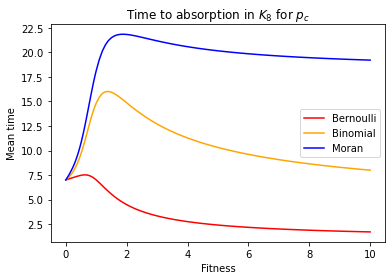

In [26]:
plt.plot(rs, [TimeBer[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBin[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMor[0](r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to absorption in $K_{N}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"k{N}_absorption.pdf")

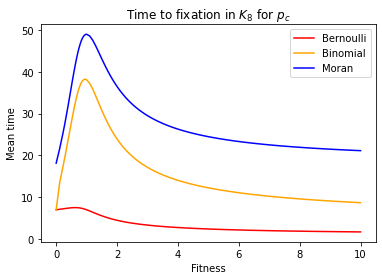

In [27]:
plt.plot(rs, [TimeBerF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBinF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMorF[0](r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to fixation in $K_{N}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"k{N}_fixation.pdf")

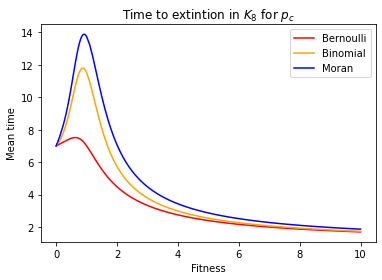

In [28]:
plt.plot(rs, [TimeBerNF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBinNF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMorNF[0](r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to extintion in $K_{N}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"k{N}_extintion.pdf")

### r =1 zoom

In [31]:
%%time 
N = 6
Pmor = matrix(F, [[0]* (N+1)] * (N+1))
Pbin = matrix(F, [[0]* (N+1)] * (N+1))
Pber = matrix(F, [[0]* (N+1)] * (N+1))

Pmor[:] = 0

Pmor[0,0] = Pbin[0,0] = Pber[0,0] = 1
Pmor[N,N] = Pbin[N,N] = Pber[N,N] = 1

for i in range(1,N):
    Pmor[i,i-1] = (N-i) / (N-i + r*i) * i / (N-1)
    Pmor[i,i+1] = r*i / (N-i + r*i) * (N-i) / (N-1)
    Pmor[i,i] = 1 - sum(Pmor.row(i))
    
    Pber[i,i-1] = (N-i) / (N-i + r*i) * i / (N-1)
    Pber[i,N] = r*i / (N-i + r*i) * p
    Pber[i,i] = 1 - sum(Pber.row(i))

    Pbin[i,i-1] = (N-i) / (N-i + r*i) * i / (N-1)
    Pbin[i,i+1:] = r*i / (N-i + r*i)
    for k in range(1,N-i+1):
        Pbin[i,i+k] *= binomial(N-i, k) * p**k * (1-p)**(N-i - k)
        
    Pbin[i,i] = 1 - sum(Pbin.row(i))

# Simplifications... I have not managed to do it in a reasonable way.. 
Pmor = Pmor.change_ring(SR).change_ring(F)
Pber = Pber.change_ring(SR).change_ring(F)
Pbin = Pbin.change_ring(SR).change_ring(F)

Qmor = identity_matrix(N-1) - Pmor[1:-1,1:-1]
Qbin = identity_matrix(N-1) - Pbin[1:-1,1:-1]
Qber = identity_matrix(N-1) - Pber[1:-1,1:-1]

Phimor = Qmor.solve_right(vector(Pmor[1:-1,-1]))
Phibin = Qbin.solve_right(vector(Pbin[1:-1,-1]))
Phiber = Qber.solve_right(vector(Pber[1:-1,-1]))

# Simplifications... I have not managed to do it in a reasonable way
Phimor = Phimor.change_ring(SR).change_ring(F)
Phibin = Phibin.change_ring(SR).change_ring(F)
Phiber = Phiber.change_ring(SR).change_ring(F)

TimeBin = Qbin.solve_right(vector([1]*(N-1)))
TimeBin = TimeBin.change_ring(SR).change_ring(F)

TimeBer = Qber.solve_right(vector([1]*(N-1)))
TimeBer = TimeBer.change_ring(SR).change_ring(F)

TimeMor = Qmor.solve_right(vector([1]*(N-1)))
TimeMor = TimeMor.change_ring(SR).change_ring(F)

# Conditionated times
PmorF = copy(Pmor)
PberF = copy(Pber)
PbinF = copy(Pbin)

for i in range(1,N):
    PmorF.rescale_col(i, Phimor[i-1])
    PmorF.rescale_row(i, 1/Phimor[i-1])
    
    PberF.rescale_col(i, Phiber[i-1])
    PberF.rescale_row(i, 1/Phiber[i-1])
    
    PbinF.rescale_col(i, Phibin[i-1])
    PbinF.rescale_row(i, 1/Phibin[i-1])

QmorF = identity_matrix(N-1) - PmorF[1:-1,1:-1]
QbinF = identity_matrix(N-1) - PbinF[1:-1,1:-1]
QberF = identity_matrix(N-1) - PberF[1:-1,1:-1]
    
TimeBinF = QbinF.solve_right(vector([1]*(N-1)))
TimeBinF = TimeBinF.change_ring(SR).change_ring(F)

TimeBerF = QberF.solve_right(vector([1]*(N-1)))
TimeBerF = TimeBerF.change_ring(SR).change_ring(F)

TimeMorF = QmorF.solve_right(vector([1]*(N-1)))
TimeMorF = TimeMorF.change_ring(SR).change_ring(F)

TimeMorNF = ((TimeMor - Phimor[0] * TimeMorF) / (1 - Phimor[0])).change_ring(SR).change_ring(F)
TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

CPU times: user 826 ms, sys: 2 μs, total: 826 ms
Wall time: 826 ms


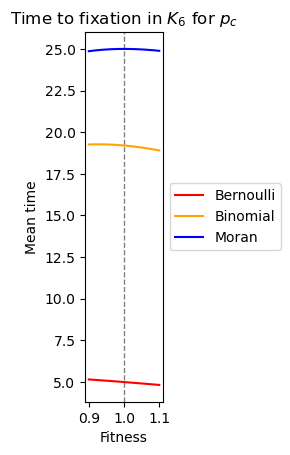

In [32]:
rs = [9/10,9/10+1/800..11/10]
pcsbin = []
pcsber = []
tmpbin = (Phibin[0] - Phimor[0])
tmpber = (Phiber[0] - Phimor[0])
for valr in rs:
    if valr == 0:
        pcsbin.append(0)
        pcsber.append(0)
    else:
        pcsbin.append(pc(tmpbin.numerator().subs(r=valr)))
        pcsber.append(pc(tmpber.numerator().subs(r=valr)))


plt.figure().set_figwidth(1)
plt.plot(rs, [TimeBerF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [TimeBinF[0](r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [TimeMorF[0](r=valr) for valr in rs], c="blue", label="Moran")
ylim = plt.ylim()
plt.plot([1,1], ylim, '--', zorder=0, c="gray", linewidth=1)
plt.ylim(ylim)
plt.title(f"Time to fixation in $K_{{{N}}}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"k{N}_fixation_zoom.pdf", bbox_inches="tight")